In [1]:
import pandas as pd

# Specify the file path
file_path = "C:\\Users\\prabi\\OneDrive\\Documents\\Aishu\\hotel_reviews.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

In [2]:
df

Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]

In [3]:
df.head()


Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [5]:
# Summary statistics for numerical columns
print(df.describe())

             Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000


In [6]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [8]:
# Check for null values in the dataset
null_values = df.isnull().sum()
print("Null Values in the Dataset:")
print(null_values)


Null Values in the Dataset:
Review    0
Rating    0
dtype: int64


In [3]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20486    False
20487    False
20488    False
20489    False
20490    False
Length: 20491, dtype: bool

In [4]:
df[df.duplicated()].shape

(0, 2)

In [4]:
df.corr()

Rating
Rating     1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

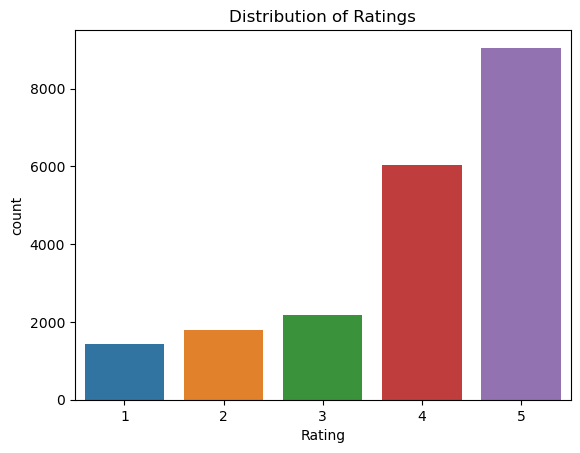

<IPython.core.display.Javascript object>

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(df['Rating'])
plt.title('Distribution of Ratings')
plt.show()
plt.show()

In [4]:
from pandas_profiling import ProfileReport
# Create a ProfileReport
profile = ProfileReport(df, title="Hotel Rating EDA Report", explorative=True)

# Generate the report
profile.to_file("hotel_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
import sweetviz as sv

# Create a DataframeReport
report = sv.analyze(df)

# Display the report
report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#file:///C:/Users/prabi/Documents/sweetviz_report.html

In [12]:
# Summary statistics for ratings
rating_stats = df['Rating'].describe()

print("Summary Statistics for Ratings:")
print(rating_stats)

Summary Statistics for Ratings:
count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


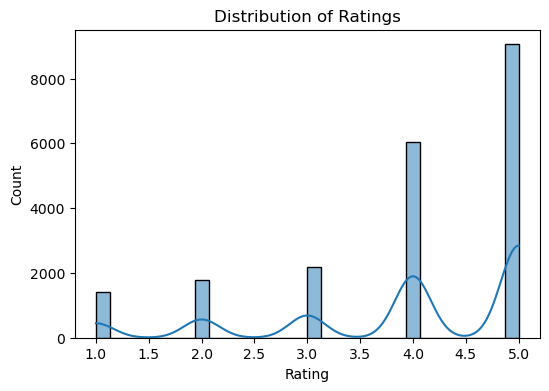

In [38]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

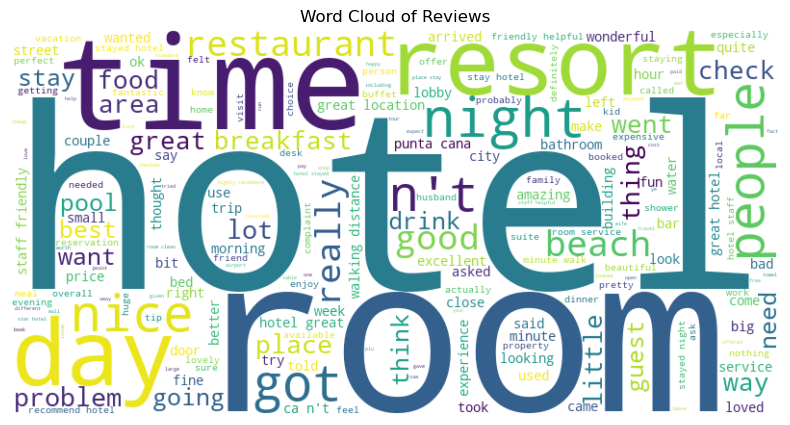

In [15]:
from wordcloud import WordCloud
# Example: Word cloud of most common words in reviews
reviews = df["Review"].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

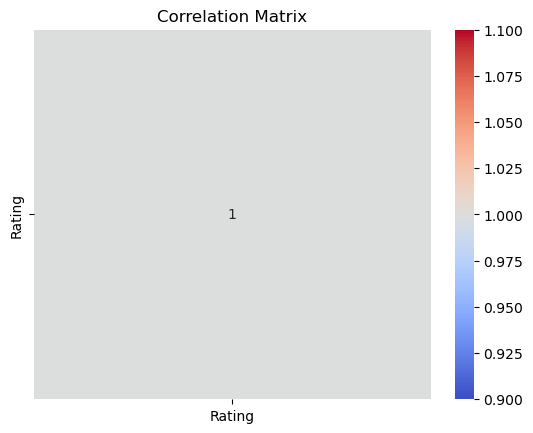

In [37]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

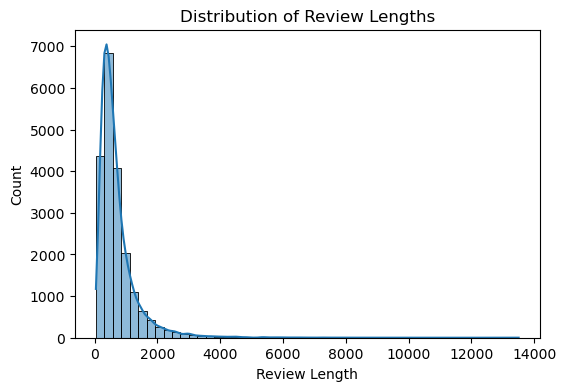

In [4]:
# Distribution of Review Length
df['review_length'] = df['Review'].apply(len)
plt.figure(figsize=(6, 4))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

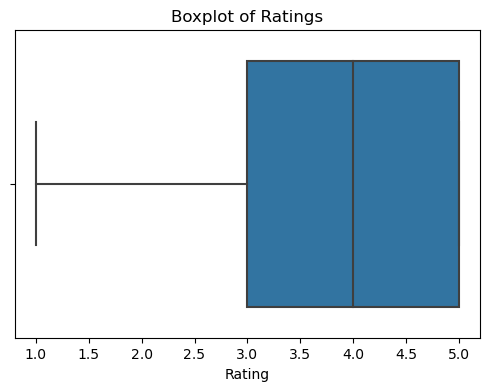

In [5]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Rating', data=df)
plt.xlabel('Rating')
plt.title('Boxplot of Ratings')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

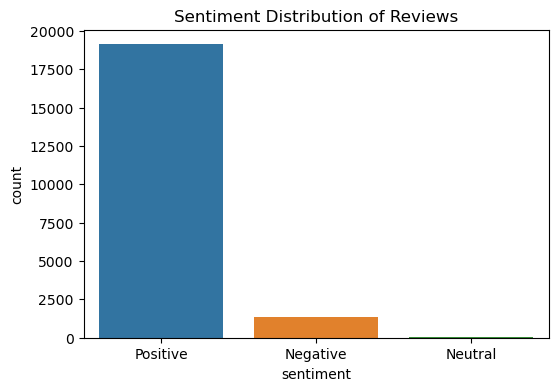

In [16]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
df['sentiment'] = df['Review'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution of Reviews')
plt.show()
#Perform sentiment analysis on the reviews to understand the overall sentiment of the reviews

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

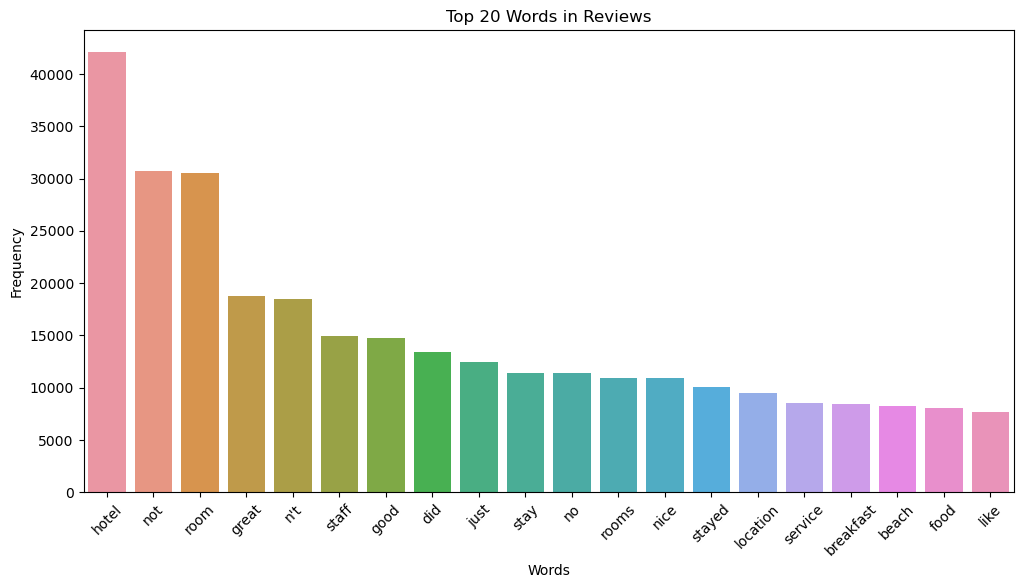

In [5]:
from collections import Counter

# Tokenize and count words in reviews
words = ' '.join(df['Review']).split()
word_count = Counter(words)

# Get the top N words
top_words = word_count.most_common(20)

# Visualize the top words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Reviews')
plt.xticks(rotation=45)
plt.show()


In [40]:
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

Average Rating: 3.95


In [44]:
top_rated_hotels = df.nlargest(10, 'Rating')
print(top_rated_hotels[[ 'Rating']])

    Rating
3        5
4        5
5        5
6        5
8        5
9        5
17       5
18       5
20       5
21       5


In [6]:
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['Rating'] >= 4]['Review'])
negative_reviews = ' '.join(df[df['Rating'] <= 2]['Review'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

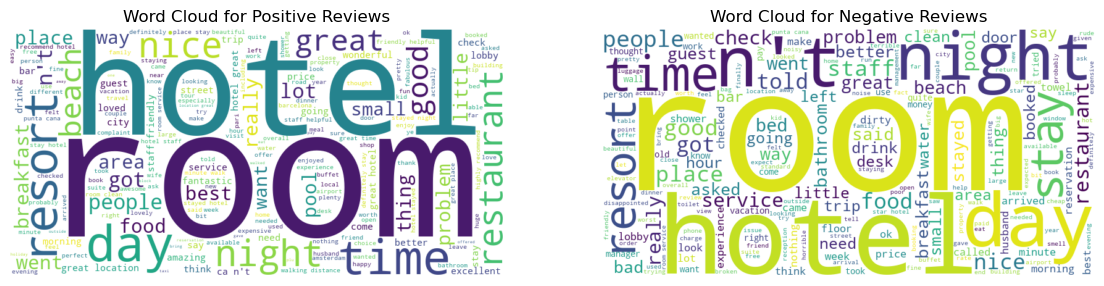

In [7]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [8]:
#Convert text to lowercase:
df['Review'] = df['Review'].str.lower()

In [9]:
#Remove special characters and punctuation:


import string

def remove_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

df['Review'] = df['Review'].apply(remove_punctuation)

In [10]:
from nltk.tokenize import word_tokenize

df['Review'] = df['Review'].apply(word_tokenize)

In [11]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Review'] = df['Review'].apply(remove_stopwords)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

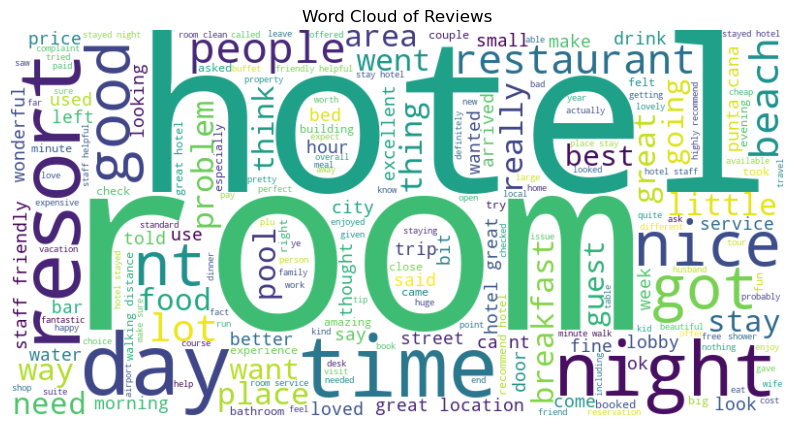

In [12]:
from wordcloud import WordCloud

# Combine all the reviews into a single text
all_reviews = ' '.join([' '.join(review) for review in df['Review']])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

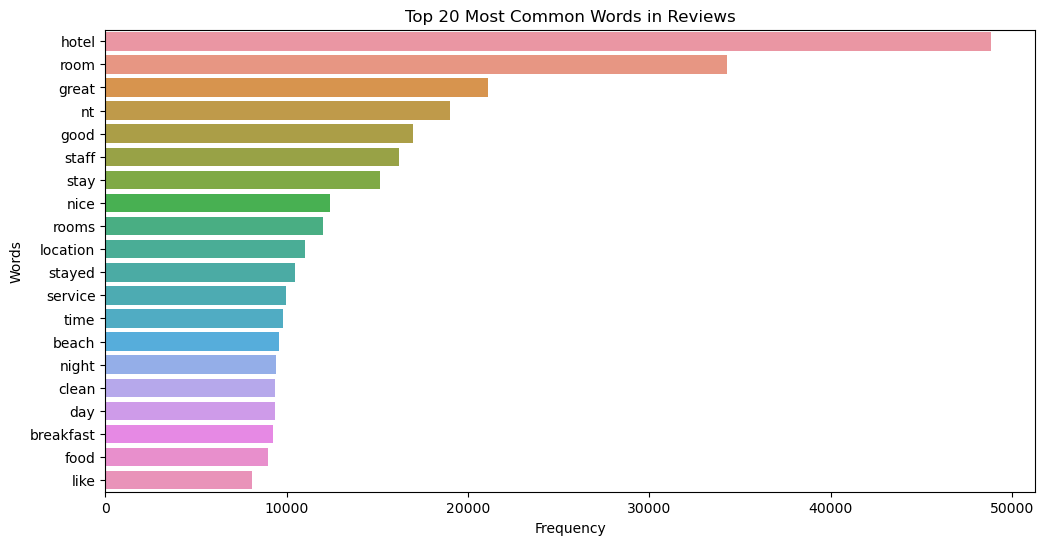

In [13]:
from collections import Counter

# Combine all the reviews into a single text
all_reviews = ' '.join([' '.join(review) for review in df['Review']])

# Tokenize and count word frequencies
word_tokens = all_reviews.split()
word_counts = Counter(word_tokens)
# Plot the top N most frequent words
top_n = 20
common_words = [word for word, count in word_counts.most_common(top_n)]
common_word_counts = [count for word, count in word_counts.most_common(top_n)]

plt.figure(figsize=(12, 6))
sns.barplot(x=common_word_counts, y=common_words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title(f'Top {top_n} Most Common Words in Reviews')
plt.show()

In [14]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Ensure that all data in the "Review" column is treated as strings
df['Review'] = df['Review'].astype(str)

# Tokenization
df['Tokenized_Review'] = df['Review'].apply(word_tokenize)

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


In [15]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download NLTK resources (if not already downloaded)
nltk.download('wordnet')

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Lemmatization
df['Lemmatized_Review'] = df['Tokenized_Review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Stemming
df['Stemmed_Review'] = df['Tokenized_Review'].apply(lambda x: [stemmer.stem(word) for word in x])

[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


In [16]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Lemmatized_Review'] = df['Lemmatized_Review'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df['Stemmed_Review'] = df['Stemmed_Review'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [17]:
import string

def remove_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

df['Review'] = df['Review'].apply(remove_punctuation)

In [18]:
df

Review  Rating  \
0      nice hotel expensive parking got good deal sta...       4   
1      ok nothing special charge diamond member hilto...       2   
2      nice rooms 4 experience hotel monaco seattle g...       3   
3      unique great stay wonderful time hotel monaco ...       5   
4      great stay great stay went seahawk game awesom...       5   
...                                                  ...     ...   
20486  best kept secret 3rd time staying charm 5star ...       5   
20487  great location price view hotel great quick pl...       4   
20488  ok looks nice modern outside desk staff nt par...       2   
20489  hotel theft ruined vacation hotel opened sept ...       1   
20490  people talking ca nt believe excellent ratings...       2   

       review_length                                   Tokenized_Review  \
0                593  [[, 'nice, ', ,, 'hotel, ', ,, 'expensive, ', ...   
1               1689  [[, 'ok, ', ,, 'nothing, ', ,, 'special, ', ,,...   
2               1427  [[, 'nice, ', ,, 'rooms, ', ,, ', 4, ', ,, 'ex...   
3                600  [[, 'unique, ', ,, 'great, ', ,, 'stay, ', ,, ...   
4               1281  [[, 'great, ', ,, 'stay, ', ,, 'great, ', ,, '...   
...              ...                                                ...   
20486            733  [[, 'best, ', ,, 'kept, ', ,, 'secret, ', ,, '...   
20487            306  [[, 'great, ', ,, 'location, ', ,, 'price, ', ...   
20488            443  [[, 'ok, ', ,, 'looks, ', ,, 'nice, ', ,, 'mod...   
20489           5557  [[, 'hotel, ', ,, 'theft, ', ,, 'ruined, ', ,,...   
20490            620  [[, 'people, ', ,, 'talking, ', ,, 'ca, ', ,, ...   

                                       Lemmatized_Review  \
0      [[, 'nice, ', ,, 'hotel, ', ,, 'expensive, ', ...   
1      [[, 'ok, ', ,, 'nothing, ', ,, 'special, ', ,,...   
2      [[, 'nice, ', ,, 'rooms, ', ,, ', 4, ', ,, 'ex...   
3      [[, 'unique, ', ,, 'great, ', ,, 'stay, ', ,, ...   
4      [[, 'great, ', ,, 'stay, ', ,, 'great, ', ,, '...   
...                                                  ...   
20486  [[, 'best, ', ,, 'kept, ', ,, 'secret, ', ,, '...   
20487  [[, 'great, ', ,, 'location, ', ,, 'price, ', ...   
20488  [[, 'ok, ', ,, 'looks, ', ,, 'nice, ', ,, 'mod...   
20489  [[, 'hotel, ', ,, 'theft, ', ,, 'ruined, ', ,,...   
20490  [[, 'people, ', ,, 'talking, ', ,, 'ca, ', ,, ...   

                                          Stemmed_Review  
0      [[, 'nice, ', ,, 'hotel, ', ,, 'expens, ', ,, ...  
1      [[, 'ok, ', ,, 'noth, ', ,, 'special, ', ,, 'c...  
2      [[, 'nice, ', ,, 'room, ', ,, ', 4, ', ,, 'exp...  
3      [[, 'uniqu, ', ,, 'great, ', ,, 'stay, ', ,, '...  
4      [[, 'great, ', ,, 'stay, ', ,, 'great, ', ,, '...  
...                                                  ...  
20486  [[, 'best, ', ,, 'kept, ', ,, 'secret, ', ,, '...  
20487  [[, 'great, ', ,, 'locat, ', ,, 'price, ', ,, ...  
20488  [[, 'ok, ', ,, 'look, ', ,, 'nice, ', ,, 'mode...  
20489  [[, 'hotel, ', ,, 'theft, ', ,, 'ruin, ', ,, '...  
20490  [[, 'peopl, ', ,, 'talk, ', ,, 'ca, ', ,, 'nt,...  

[20491 rows x 6 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

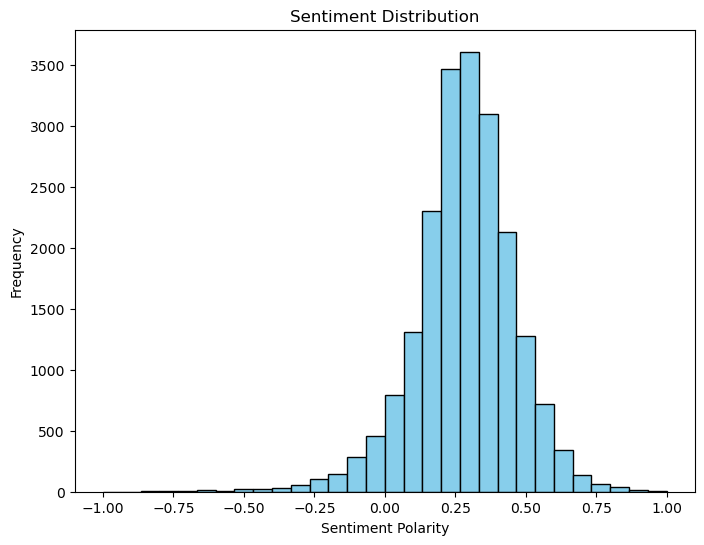

In [19]:
from textblob import TextBlob

# Function to calculate sentiment polarity of a text
def calculate_sentiment(text):
    analysis = TextBlob(' '.join(text))
    return analysis.sentiment.polarity

# Calculate sentiment polarity for each review
df['Sentiment_Polarity'] = df['Lemmatized_Review'].apply(calculate_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment_Polarity'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

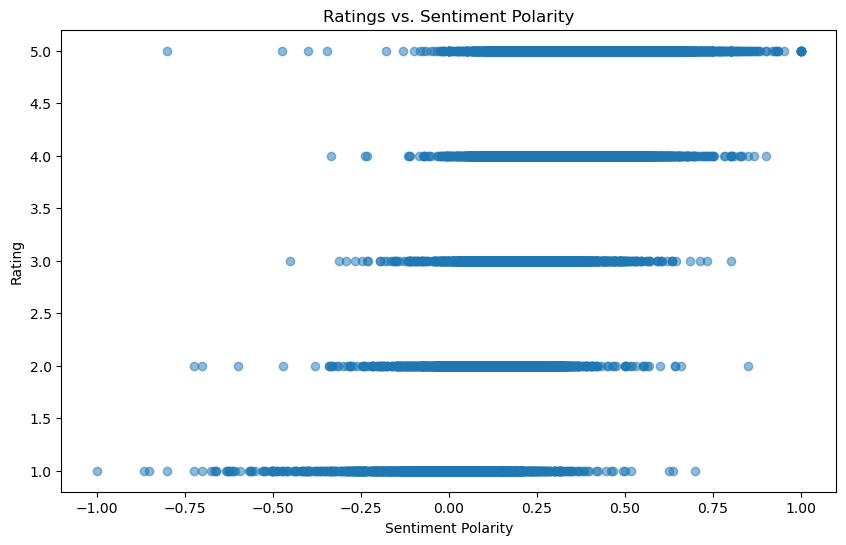

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Sentiment_Polarity'], df['Rating'], alpha=0.5)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Rating')
plt.title('Ratings vs. Sentiment Polarity')
plt.show

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

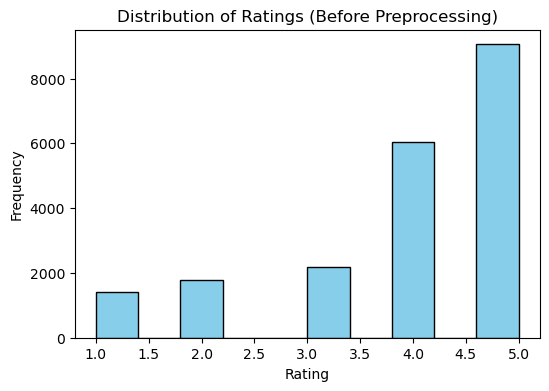

In [21]:
# Visualize the distribution of ratings
plt.figure(figsize=(6, 4))
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings (Before Preprocessing)')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

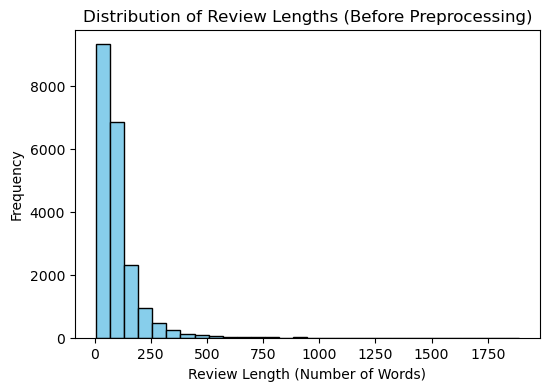

In [22]:
# Visualize the length of reviews (number of words)
df['Review_Length'] = df['Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 4))
plt.hist(df['Review_Length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths (Before Preprocessing)')
plt.show()

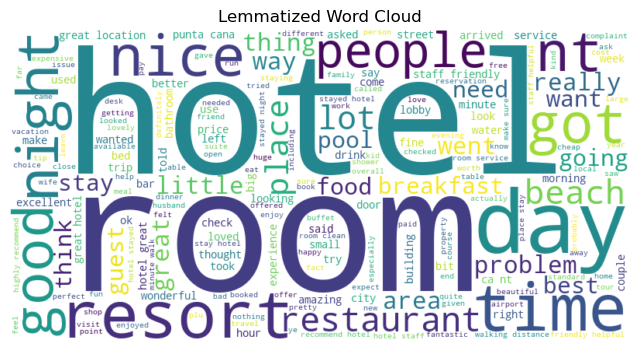

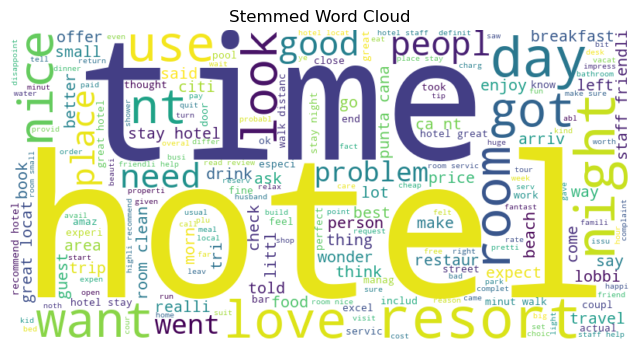

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word clouds
def generate_word_cloud(text_column, title):
    all_text = ' '.join(' '.join(words) for words in text_column)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds
generate_word_cloud(df['Lemmatized_Review'], 'Lemmatized Word Cloud')
generate_word_cloud(df['Stemmed_Review'], 'Stemmed Word Cloud')

In [24]:
# Ensure that all data in the "Review" column is treated as strings
df['Review'] = df['Review'].astype(str)

# Tokenization
df['Tokenized_Review'] = df['Review'].apply(word_tokenize)

# Remove stopwords and punctuation, and convert to lowercase
stop_words = set(stopwords.words('english'))
df['Cleaned_Review'] = df['Tokenized_Review'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words and word not in string.punctuation])

# Join the cleaned words back into sentences
df['Cleaned_Review'] = df['Cleaned_Review'].apply(lambda x: ' '.join(x))
#new column called "Cleaned_Review" in your DataFrame, which contains the text data with stopwords removed, punctuation removed, and all text converted to lowercase. This cleaned and processed text data is suitable for various text analysis tasks.

In [25]:
df['Cleaned_Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms 4 experience hotel monaco seattle g...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret 3rd time staying charm 5star ...
20487    great location price view hotel great quick pl...
20488    ok looks nice modern outside desk staff nt par...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent ratings...
Name: Cleaned_Review, Length: 20491, dtype: object

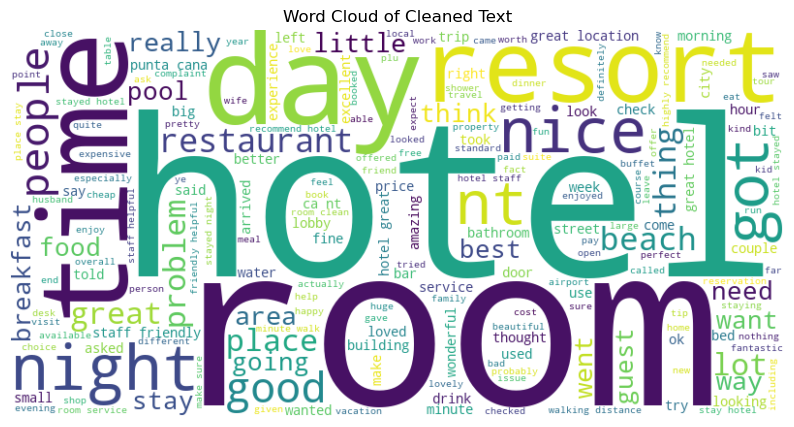

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud
def generate_word_cloud(text_column, title):
    all_text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for cleaned text
generate_word_cloud(df['Cleaned_Review'], 'Word Cloud of Cleaned Text')

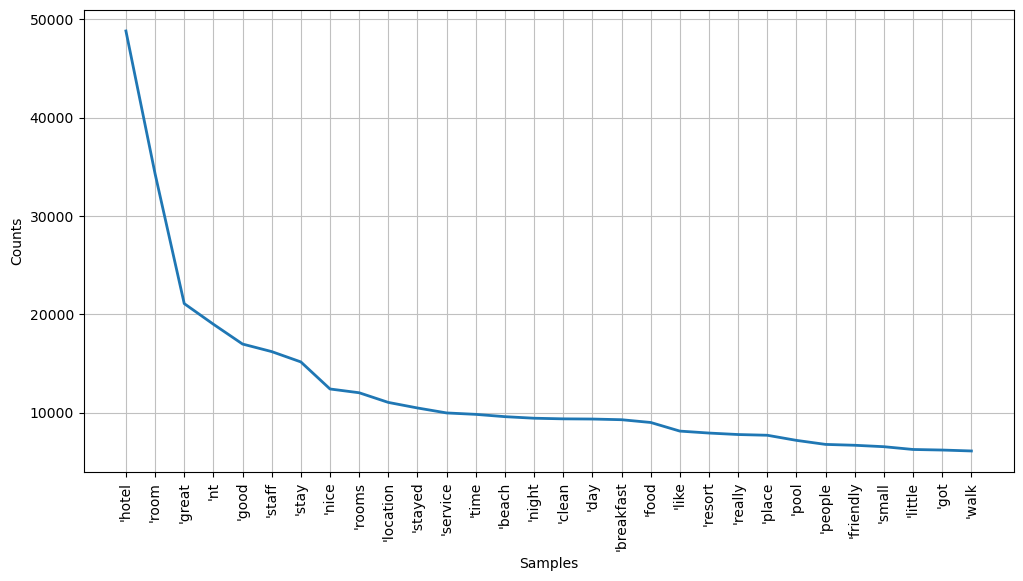

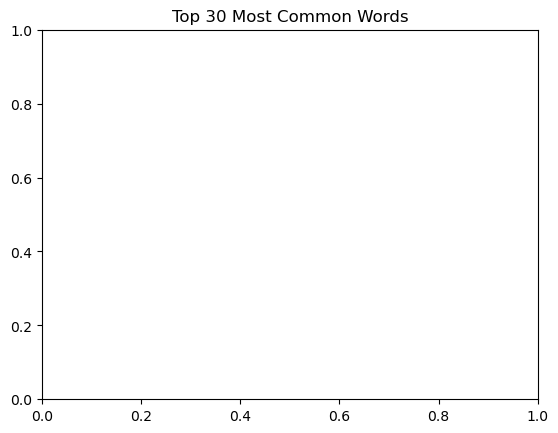

In [30]:
from nltk.probability import FreqDist

# Create a frequency distribution of words
fdist = FreqDist(' '.join(df['Cleaned_Review']).split())


# Plot the most common words
plt.figure(figsize=(12, 6))
fdist.plot(30, cumulative=False)
plt.title('Top 30 Most Common Words')
plt.show()

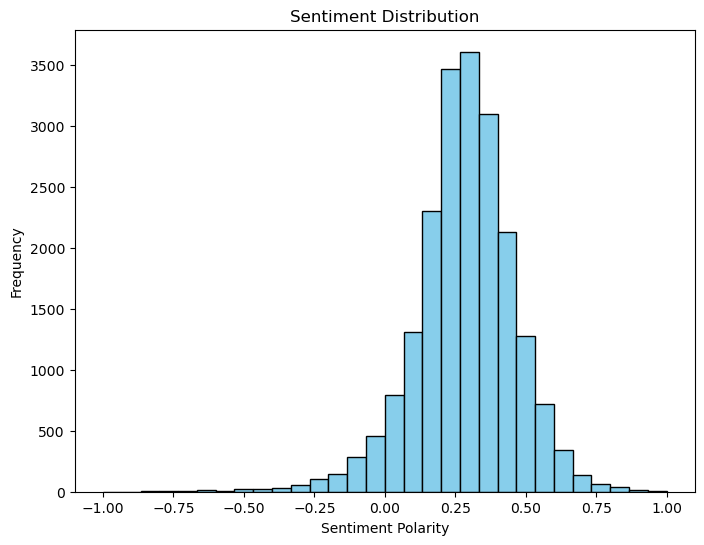

In [31]:
from textblob import TextBlob

# Function to calculate sentiment polarity of a text
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Calculate sentiment polarity for each cleaned review
df['Sentiment_Polarity'] = df['Cleaned_Review'].apply(calculate_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment_Polarity'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


<IPython.core.display.Javascript object>

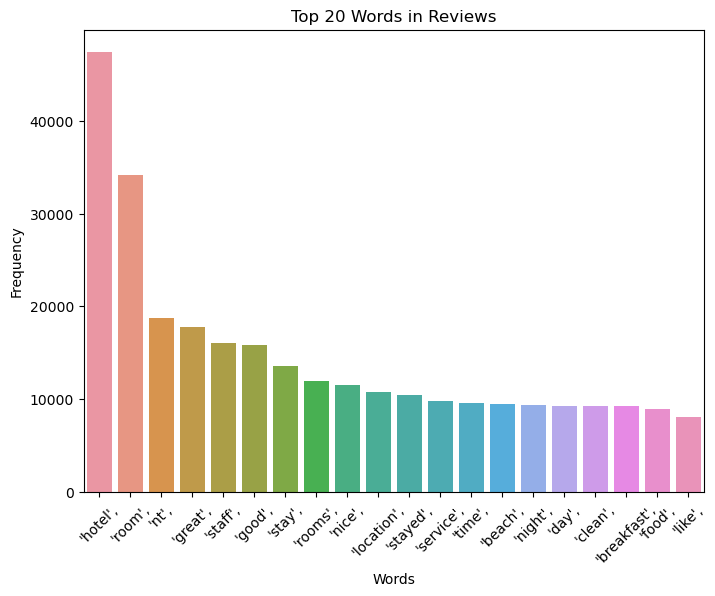

In [32]:
from collections import Counter

# Tokenize and count words in reviews
words = ' '.join(df['Review']).split()
word_count = Counter(words)

# Get the top N words
top_words = word_count.most_common(20)

# Visualize the top words
plt.figure(figsize=(8, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Reviews')
plt.xticks(rotation=45)
plt.show()


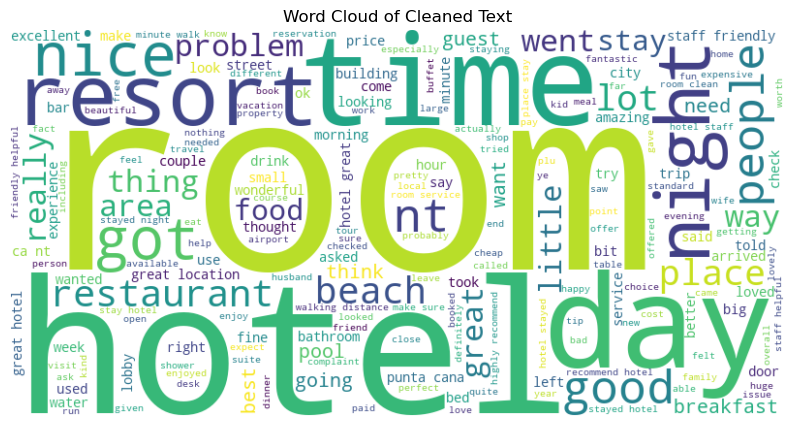

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the cleaned reviews into a single text
all_cleaned_text = ' '.join(df['Cleaned_Review'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()

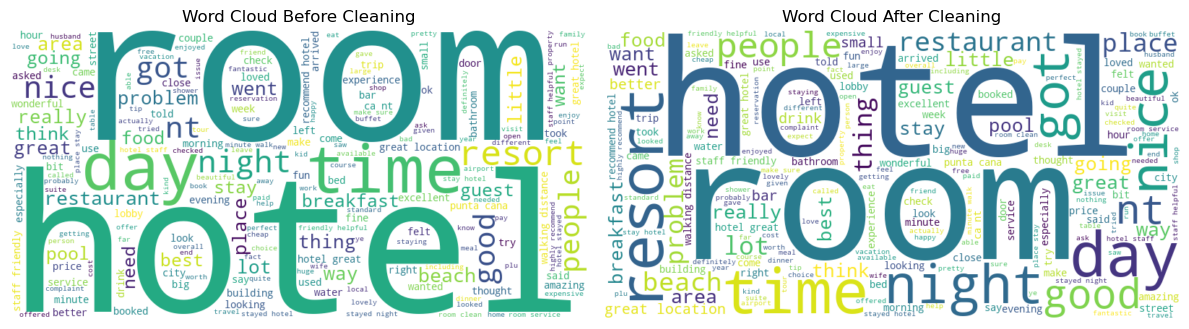

In [27]:
from wordcloud import WordCloud

# Combine all the reviews into a single text before and after cleaning
all_reviews_before = ' '.join(df['Review'])
all_reviews_after = ' '.join(df['Cleaned_Review'])

# Create word clouds for both
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_before)
wordcloud_after = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_after)

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Cleaning')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After Cleaning')

plt.tight_layout()
plt.show()

In [28]:
# Define a function to calculate sentiment values
def calculate_sentiment(review):
    analysis = TextBlob(review)
    sentiment_score = analysis.sentiment.polarity
    return sentiment_score

# Apply the function to each review in the dataset
df['Sentiment_Score'] = df['Review'].apply(calculate_sentiment)

# Print the first few rows of the DataFrame with sentiment scores
print(df[['Review', 'Sentiment_Score']].head())

                                              Review  Sentiment_Score
0  nice hotel expensive parking got good deal sta...         0.208744
1  ok nothing special charge diamond member hilto...         0.235193
2  nice rooms 4 experience hotel monaco seattle g...         0.294420
3  unique great stay wonderful time hotel monaco ...         0.504825
4  great stay great stay went seahawk game awesom...         0.471154


In [49]:
# Define a function to extract bigrams from text
def extract_bigrams(text):
    blob = TextBlob(text)
    bigrams = [tuple(blob.words[i:i+2]) for i in range(len(blob.words) - 1)]
    return bigrams

# Define a sentiment threshold to separate positive and negative reviews
sentiment_threshold = 0.1  # Adjust this threshold as needed

# Separate positive and negative reviews based on sentiment
positive_reviews = df[df['Rating'] > sentiment_threshold]['Review']
negative_reviews = df[df['Rating'] < -sentiment_threshold]['Review']


In [50]:
# Extract bigrams from positive and negative reviews
positive_bigrams = []
negative_bigrams = []

for review in positive_reviews:
    positive_bigrams.extend(extract_bigrams(review))

for review in negative_reviews:
    negative_bigrams.extend(extract_bigrams(review))

# Count the frequency of bigrams
positive_bigram_counts = Counter(positive_bigrams)
negative_bigram_counts = Counter(negative_bigrams)

In [51]:
# Print the top bigrams for positive and negative reviews
print("Top Bigrams in Positive Reviews:")
print(positive_bigram_counts.most_common(10))

print("\nTop Bigrams in Negative Reviews:")
print(negative_bigram_counts.most_common(10))

Top Bigrams in Positive Reviews:
[(("'great", "'location"), 2138), (("'staff", "'friendly"), 2075), (("'ca", "'nt"), 1809), (("'punta", "'cana"), 1682), (("'hotel", "'great"), 1456), (("'great", "'hotel"), 1433), (("'walking", "'distance"), 1418), (("'recommend", "'hotel"), 1345), (("'friendly", "'helpful"), 1337), (("'hotel", "'staff"), 1205)]

Top Bigrams in Negative Reviews:
[]


In [43]:
from textblob import TextBlob
from collections import Counter

In [44]:
# Define a function to extract trigrams from text
def extract_trigrams(text):
    blob = TextBlob(text)
    trigrams = [tuple(blob.words[i:i+3]) for i in range(len(blob.words) - 2)]
    return trigrams

In [45]:
# Separate positive and negative reviews based on a sentiment threshold
sentiment_threshold = 0.1  # Adjust this threshold as needed
positive_reviews = df[df['Rating'] > sentiment_threshold]['Review']
negative_reviews = df[df['Rating'] < -sentiment_threshold]['Review']

# Extract trigrams from positive and negative reviews
positive_trigrams = []
negative_trigrams = []

In [46]:

for review in positive_reviews:
    positive_trigrams.extend(extract_trigrams(review))

for review in negative_reviews:
    negative_trigrams.extend(extract_trigrams(review))

# Count the frequency of trigrams
positive_trigram_counts = Counter(positive_trigrams)
negative_trigram_counts = Counter(negative_trigrams)


In [47]:
# Print the top trigrams for positive and negative reviews
print("Top Trigrams in Positive Reviews:")
print(positive_trigram_counts.most_common(10))

print("\nTop Trigrams in Negative Reviews:")
print(negative_trigram_counts.most_common(10))

Top Trigrams in Positive Reviews:
[(("'staff", "'friendly", "'helpful"), 699), (("'hotel", "'great", "'location"), 541), (("'old", "'san", "'juan"), 354), (("'highly", "'recommend", "'hotel"), 313), (("'great", "'place", "'stay"), 272), (("'ca", "'nt", "'wait"), 241), (("'king", "'size", "'bed"), 231), (("'flat", "'screen", "'tv"), 231), (("'great", "'hotel", "'great"), 225), (("'good", "'value", "'money"), 214)]

Top Trigrams in Negative Reviews:
[]


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame 'df' with a 'Cleaned_Review' column
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Review'])

In [18]:
from textblob import TextBlob

# Assuming you have a 'Cleaned_Review' column in your DataFrame 'df'
df['Sentiment_Score'] = df['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 'Sentiment_Score' now contains sentiment scores for each cleaned review.

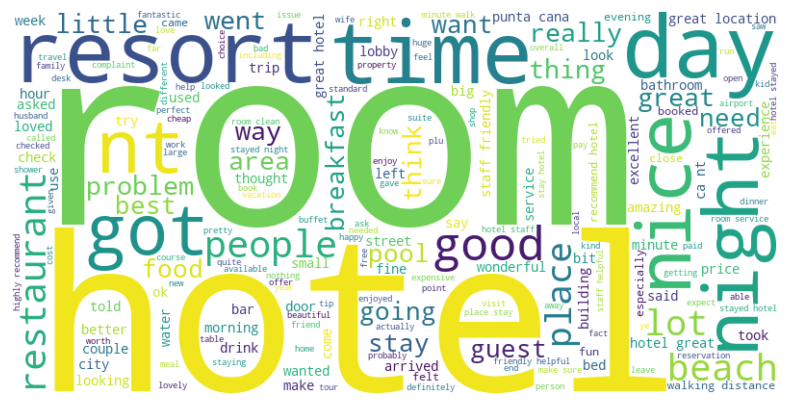

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'Cleaned_Review' column
# Concatenate all the cleaned reviews into a single string
all_cleaned_text = ' '.join(df['Cleaned_Review'])

# Create a word cloud from the concatenated text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [40]:
from textblob import TextBlob

# Assuming you have a 'Cleaned_Review' column in your DataFrame
df['Sentiment_Score'] = df['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)



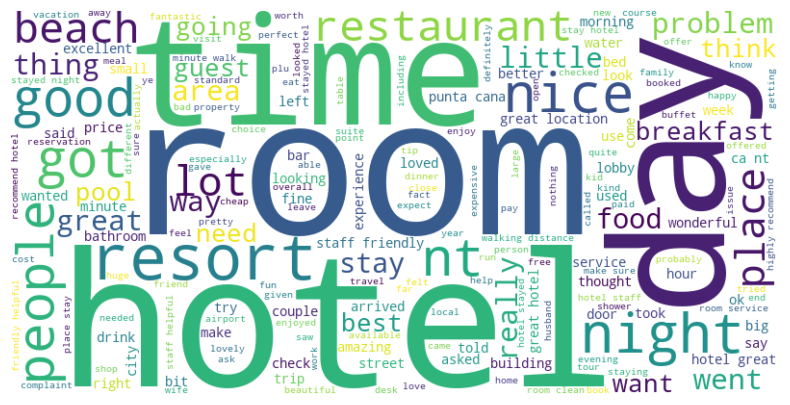

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'Cleaned_Review' column
# Concatenate all the cleaned reviews into a single string
all_cleaned_text = ' '.join(df['Cleaned_Review'])

# Create a word cloud from the concatenated text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
df['Review Length'] = df['Review'].apply(len)

In [22]:
df['Word Count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [37]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

In [37]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


In [45]:
# Download the NLTK stopwords dataset
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [39]:
# Specify the correct column containing the text data for sentiment analysis
text_column_name = 'Review'  # Replace with the actual column name

# Function to remove stopwords from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


In [40]:
# Apply the remove_stopwords function to your text column
df[text_column_name] = df[text_column_name].apply(remove_stopwords)


In [41]:
# Perform sentiment analysis on the cleaned text
sentiments = []
for text in df[text_column_name]:
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    

In [42]:
sentiments.append(sentiment)
# Add sentiment results to the DataFrame
df['Sentiment'] = sentiments

# Count the number of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Calculate the percentage of each sentiment
sentiment_percentages = (sentiment_counts / len(df)) * 100


ValueError: Length of values (1) does not match length of index (20491)

In [56]:
# Display the results
print("Sentiment Counts:")
print(sentiment_counts)
print("\nSentiment Percentages:")
print(sentiment_percentages)

Sentiment Counts:
Positive    19319
Negative     1148
Neutral        24
Name: Sentiment, dtype: int64

Sentiment Percentages:
Positive    94.280416
Negative     5.602460
Neutral      0.117125
Name: Sentiment, dtype: float64


In [30]:
# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a string
    return ' '.join(words)

# Apply text preprocessing to the 'Review' column
df['Processed_Review'] = df['Review'].apply(preprocess_text)

In [31]:
from textblob import TextBlob

# Sentiment analysis function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Processed_Review' column
df['Sentiment'] = df['Processed_Review'].apply(analyze_sentiment)

<IPython.core.display.Javascript object>

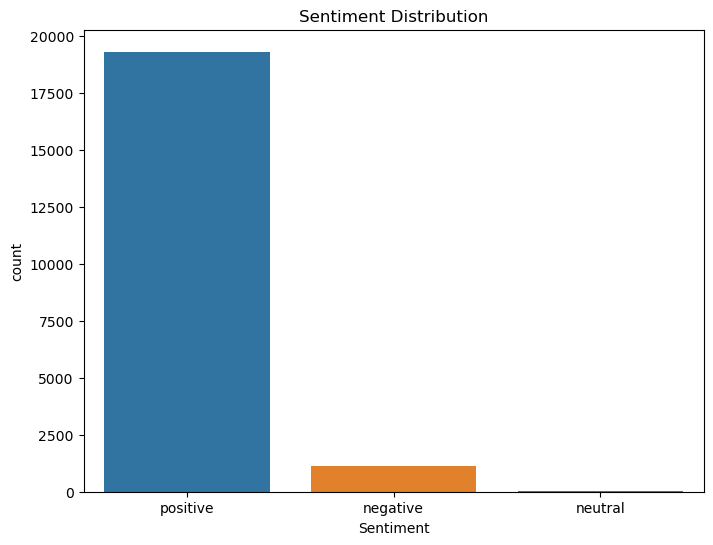

In [54]:
# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [84]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Review                0
Rating                0
sentiment             0
Tokenized_Review      0
Lemmatized_Review     0
Stemmed_Review        0
Sentiment_Polarity    0
Cleaned_Review        0
Sentiment_Score       0
Review Length         0
Word Count            0
Processed_Review      0
Sentiment             0
dtype: int64


In [32]:
# Text Preprocessing
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [33]:
# Sample text preprocessing function
import string
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)
# Apply preprocessing to your 'Reviews' column
df['Processed_Reviews'] = df['Review'].apply(preprocess_text)



In [34]:
# Preprocessing
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['Review'])
y = df['Sentiment']  # Create a 'Sentiment' column with sentiment labels (e.g., 'Positive', 'Negative')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
from sklearn.metrics import accuracy_score, classification_report


from sklearn.naive_bayes import MultinomialNB
# Build and train a text classification model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8509392534764577
Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.48      0.62      1057
    Positive       0.84      0.98      0.91      3042

    accuracy                           0.85      4099
   macro avg       0.87      0.73      0.76      4099
weighted avg       0.86      0.85      0.83      4099



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

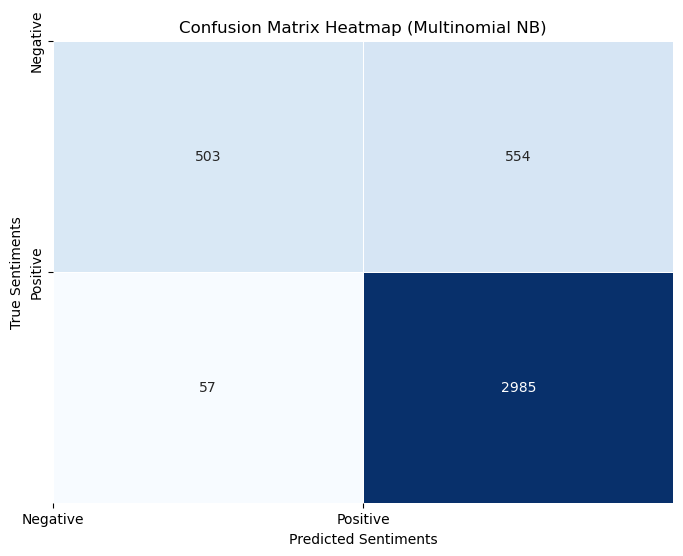

In [36]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted Sentiments')
plt.ylabel('True Sentiments')
plt.title('Confusion Matrix Heatmap (Multinomial NB)')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

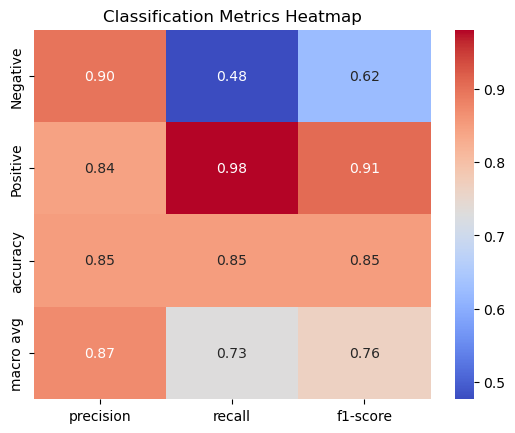

In [29]:
# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Create a heatmap for precision, recall, and F1-score
metrics = ['precision', 'recall', 'f1-score']
sns.heatmap(report_df[metrics].iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Metrics Heatmap')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report


# Model Selection
model = LogisticRegression()  # You can choose a different classifier here

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

<IPython.core.display.Javascript object>

Accuracy: 0.8926567455476946
Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.71      0.77      1057
    Positive       0.90      0.96      0.93      3042

    accuracy                           0.89      4099
   macro avg       0.88      0.83      0.85      4099
weighted avg       0.89      0.89      0.89      4099



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

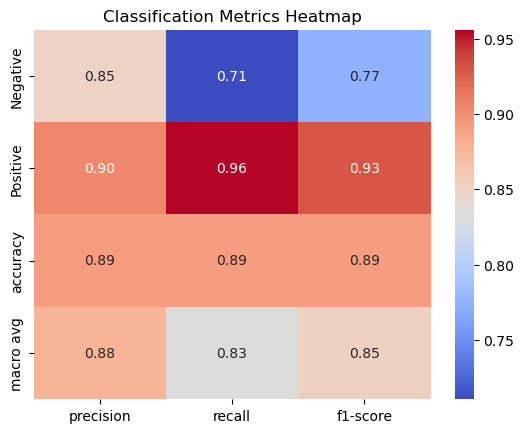

In [31]:
# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Create a heatmap for precision, recall, and F1-score
metrics = ['precision', 'recall', 'f1-score']
sns.heatmap(report_df[metrics].iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Metrics Heatmap')
plt.show()

In [121]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100)

mlp_classifier.fit(X_train, y_train)

y_pred_mlp = mlp_classifier.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP Classifier Accuracy:", accuracy_mlp)

MLP Classifier Accuracy: 0.8799707245669676


In [33]:
report = classification_report(y_test, y_pred_mlp)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.74      0.75      1057
    Positive       0.91      0.92      0.91      3042

    accuracy                           0.87      4099
   macro avg       0.83      0.83      0.83      4099
weighted avg       0.87      0.87      0.87      4099



<IPython.core.display.Javascript object>

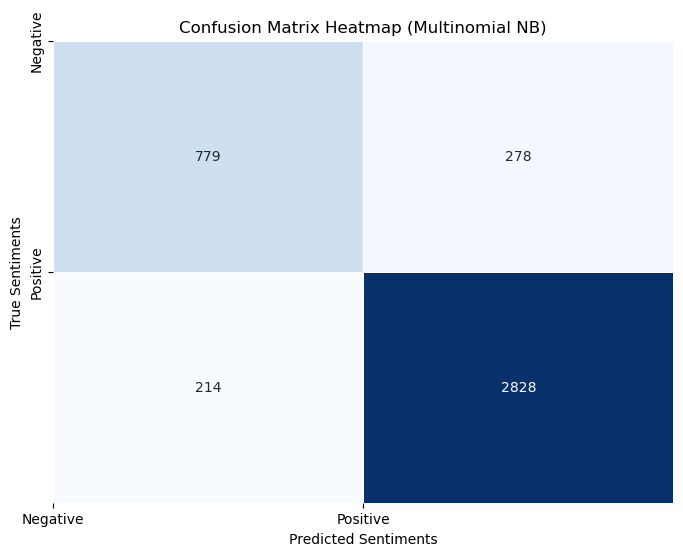

In [128]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted Sentiments')
plt.ylabel('True Sentiments')
plt.title('Confusion Matrix Heatmap (Multinomial NB)')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

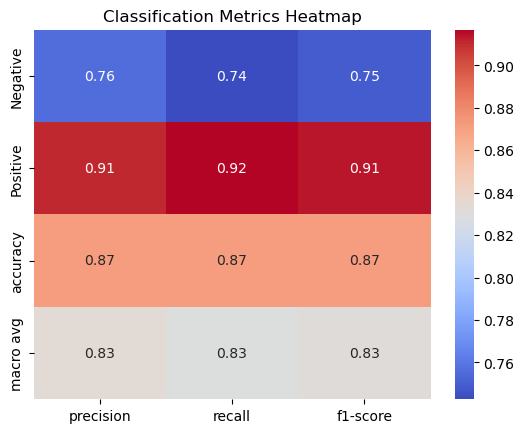

In [34]:
# Generate a classification report
report = classification_report(y_test, y_pred_mlp, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Create a heatmap for precision, recall, and F1-score
metrics = ['precision', 'recall', 'f1-score']
sns.heatmap(report_df[metrics].iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Metrics Heatmap')
plt.show()

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the MLPClassifier with possible hyperparameters to tune
mlp_classifier = MLPClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
   'hidden_layer_sizes': [(50,), (50, 25), (25, 12)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [10, 20, 30],
}

In [52]:
# Create GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the model to the data and perform cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_


In [53]:
# Get the best estimator (model) found during the search
best_mlp_classifier = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_cv = best_mlp_classifier.predict(X_test)


In [70]:
# Calculate accuracy on the test data
accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Best MLP Classifier Parameters:", best_params)
print("Best MLP Classifier Accuracy (CV):", accuracy_cv)
report = classification_report(y_test, y_pred_cv)
print("Classification Report:\n", report)

Best MLP Classifier Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
Best MLP Classifier Accuracy (CV): 0.8921688216638205
Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.72      0.77      1057
    Positive       0.91      0.95      0.93      3042

    accuracy                           0.89      4099
   macro avg       0.87      0.83      0.85      4099
weighted avg       0.89      0.89      0.89      4099



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

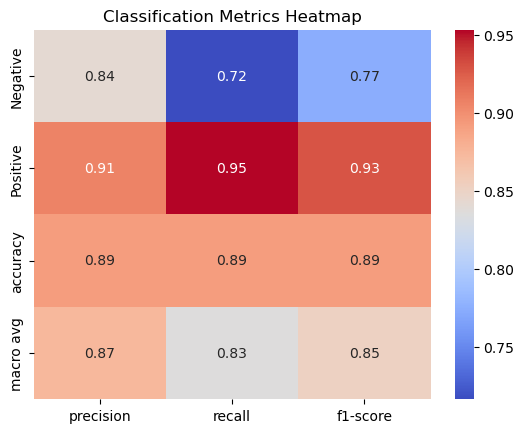

In [60]:
# Generate a classification report
report = classification_report(y_test, y_pred_cv, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Create a heatmap for precision, recall, and F1-score
metrics = ['precision', 'recall', 'f1-score']
sns.heatmap(report_df[metrics].iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Metrics Heatmap')
plt.show()

In [23]:
# Create and train the model
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = clf_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.90


In [48]:
report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", report)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.71      0.78      1057
    Positive       0.90      0.96      0.93      3042

    accuracy                           0.90      4099
   macro avg       0.88      0.83      0.85      4099
weighted avg       0.89      0.90      0.89      4099

SVM Accuracy: 0.90


In [50]:
# Calculate confusion matrix
from sklearn.metrics import classification_report, confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Generate a classification report
class_report = classification_report(y_test, y_pred_svm)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 750  307]
 [ 123 2919]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.71      0.78      1057
    Positive       0.90      0.96      0.93      3042

    accuracy                           0.90      4099
   macro avg       0.88      0.83      0.85      4099
weighted avg       0.89      0.90      0.89      4099



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

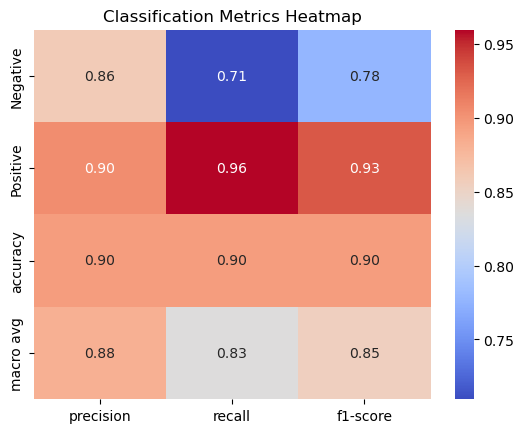

In [63]:
# Generate a classification report
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Create a heatmap for precision, recall, and F1-score
metrics = ['precision', 'recall', 'f1-score']
sns.heatmap(report_df[metrics].iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Metrics Heatmap')
plt.show()

<IPython.core.display.Javascript object>

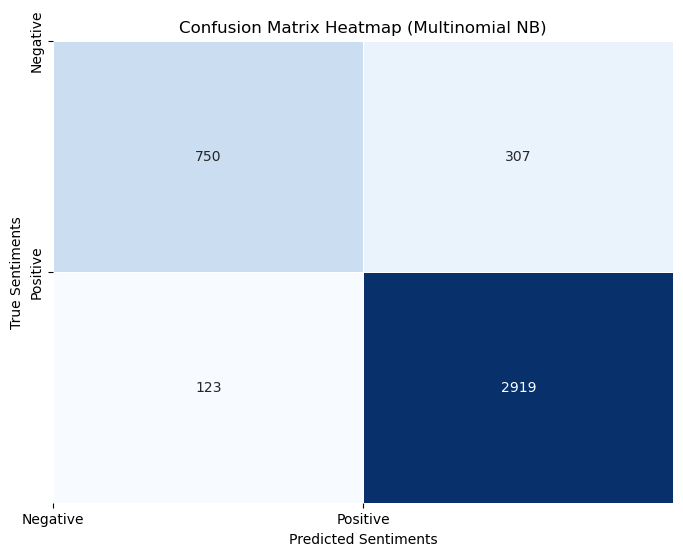

In [129]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted Sentiments')
plt.ylabel('True Sentiments')
plt.title('Confusion Matrix Heatmap (Multinomial NB)')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = clf_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.86


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Define the Random Forest classifier with possible hyperparameters to tune
rf_classifier = RandomForestClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20, 30],        # Number of trees in the forest
    'max_depth': [None, 1, 2, 3],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 8],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

In [66]:
# Create GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the model to the data and perform cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Get the best estimator (model) found during the search
best_rf_classifier = grid_search.best_estimator_

In [68]:
# Evaluate the best model on the test data
y_pred_rf = best_rf_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best Random Forest Parameters:", best_params)
print("Best Random Forest Accuracy (CV):", accuracy_rf)

Best Random Forest Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
Best Random Forest Accuracy (CV): 0.8589899975603806


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

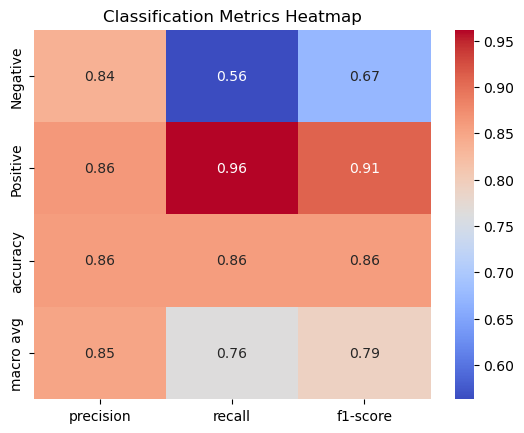

In [75]:
# Generate a classification report
report = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Create a heatmap for precision, recall, and F1-score
metrics = ['precision', 'recall', 'f1-score']
sns.heatmap(report_df[metrics].iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Metrics Heatmap')
plt.show()

In [137]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


NameError: name 'rf_classifier' is not defined

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()

ada_classifier.fit(X_train, y_train)

y_pred_ada = ada_classifier.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada)


AdaBoost Accuracy: 0.8570383020248841


In [67]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.48      0.62      1057
    Positive       0.84      0.98      0.91      3042

    accuracy                           0.85      4099
   macro avg       0.87      0.73      0.76      4099
weighted avg       0.86      0.85      0.83      4099



<IPython.core.display.Javascript object>

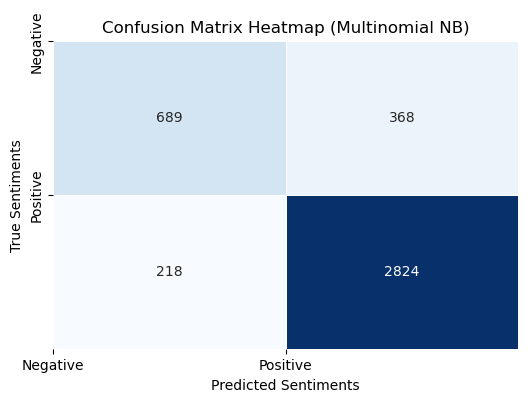

In [130]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred_ada)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted Sentiments')
plt.ylabel('True Sentiments')
plt.title('Confusion Matrix Heatmap (Multinomial NB)')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

<IPython.core.display.Javascript object>

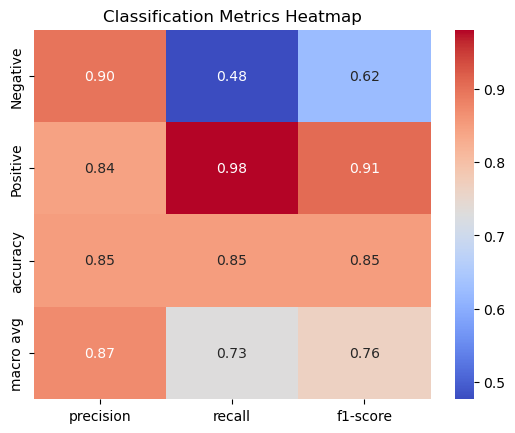

In [68]:
# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Create a heatmap for precision, recall, and F1-score
metrics = ['precision', 'recall', 'f1-score']
sns.heatmap(report_df[metrics].iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Metrics Heatmap')
plt.show()

In [115]:
# Drop unnecessary text columns
X_train = X_train.drop(['Review', 'Tokenized_Review', 'Lemmatized_Review', 'Stemmed_Review', 'Processed_Reviews'], axis=1)

# Encode 'Sentiment' column to numerical values (assuming it's a binary sentiment)
sentiment_mapping = {'Negative': 0, 'Positive': 1}
X_train['Sentiment'] = X_train['Sentiment'].map(sentiment_mapping)


In [86]:
# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100
)

# Train the model on the preprocessed training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [87]:
# Drop unnecessary text columns
X_test = X_test.drop(['Review', 'Tokenized_Review', 'Lemmatized_Review', 'Stemmed_Review', 'Processed_Reviews'], axis=1)

# Encode 'Sentiment' column to numerical values (if needed)
X_test['Sentiment'] = X_test['Sentiment'].map(sentiment_mapping)  # Use the same mapping as for training data

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Model Accuracy on Test Data:", accuracy)

XGBoost Model Accuracy on Test Data: 0.5079287631129544


In [91]:
# Assuming 'Rating' is your target variable
X = df.drop(['Rating', 'Review', 'Tokenized_Review', 'Lemmatized_Review', 'Stemmed_Review', 'Processed_Reviews'], axis=1)
y = df['Rating']

# Encode the 'Sentiment' column to numerical values
label_encoder = LabelEncoder()
X['Sentiment'] = label_encoder.fit_transform(X['Sentiment'])

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [92]:
# Create a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/10
410/410 [==============================] - 3s 3ms/step - loss: -393.7133 - accuracy: 0.0688 - val_loss: -1754.6083 - val_accuracy: 0.0671
Epoch 2/10
410/410 [==============================] - 1s 2ms/step - loss: -7181.4634 - accuracy: 0.0693 - val_loss: -15737.8223 - val_accuracy: 0.0671
Epoch 3/10
410/410 [==============================] - 1s 2ms/step - loss: -30990.8906 - accuracy: 0.0693 - val_loss: -51111.0352 - val_accuracy: 0.0671
Epoch 4/10
410/410 [==============================] - 1s 2ms/step - loss: -79035.9453 - accuracy: 0.0693 - val_loss: -113700.7344 - val_accuracy: 0.0671
Epoch 5/10
410/410 [==============================] - 1s 2ms/step - loss: -156039.1406 - accuracy: 0.0693 - val_loss: -207425.9688 - val_accuracy: 0.0671
Epoch 6/10
410/410 [==============================] - 1s 2ms/step - loss: -265464.2188 - accuracy: 0.0693 - val_loss: -335286.3438 - val_accuracy: 0.0671
Epoch 7/10
410/410 [==============================] - 1s 3ms/step - loss: -409418.6875 

In [93]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred_binary)
print("Neural Network Model Accuracy:", accuracy)

129/129 [==============================] - 0s 1ms/step
Neural Network Model Accuracy: 0.07123688704562088


In [125]:
# Create a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7706757745791657


In [126]:
# Generate a classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

              precision    recall  f1-score   support

    Negative       0.56      0.54      0.55      1057
    Positive       0.84      0.85      0.85      3042

    accuracy                           0.77      4099
   macro avg       0.70      0.70      0.70      4099
weighted avg       0.77      0.77      0.77      4099

Confusion Matrix:
[[ 572  485]
 [ 455 2587]]


In [138]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8611856550378141


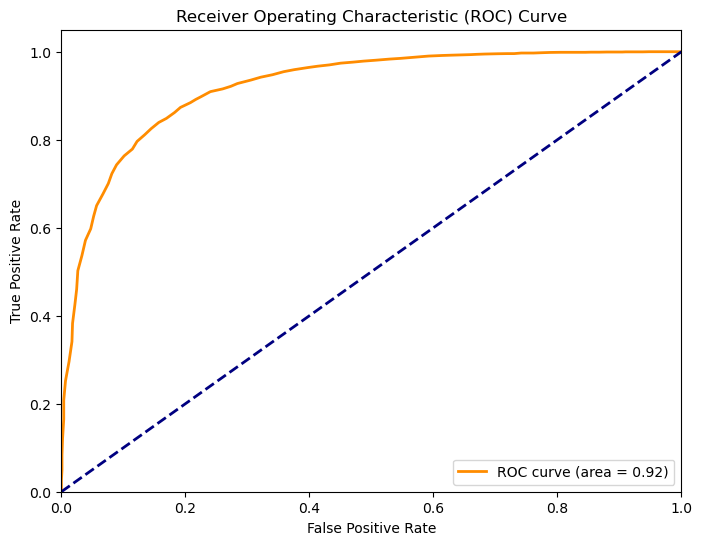

In [135]:
# Convert categorical labels to binary labels
y_test_binary = y_test.apply(lambda x: 1 if x == 'Positive' else 0)

# Compute ROC curve and ROC area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Generate a classification report
class_report = classification_report(y_test, y_pred_svm)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 750  307]
 [ 123 2919]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.71      0.78      1057
    Positive       0.90      0.96      0.93      3042

    accuracy                           0.90      4099
   macro avg       0.88      0.83      0.85      4099
weighted avg       0.89      0.90      0.89      4099



In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions for a regression problem
y_pred_regression = clf_svm.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_regression))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_regression)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

ValueError: could not convert string to float: 'Negative'

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create an SVM classifier
clf_svm = SVC()


In [ ]:
# Create a Grid Search CV object
grid_search = GridSearchCV(clf_svm, param_grid, cv=5, scoring='accuracy')

# Perform Grid Search on the training data

grid_search.fit(X_train, y_train)


In [ ]:
# Get the best parameters and estimator
best_params = grid_search.best_params_

In [ ]:
# Evaluate the best model on the test set
y_pred_svm = best_estimator.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Best Parameters:", best_params)
print(f"Best SVM Accuracy: {accuracy_svm:.2f}")

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df['Review']
y = df['Rating']  


threshold = 3
y = ['positive' if rating >= threshold else 'negative' for rating in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(max_features=5000) 

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)


X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [62]:
from sklearn.svm import SVC

svm_classifier = SVC()

svm_classifier.fit(X_train_tfidf, y_train)

y_pred_svm = svm_classifier.predict(X_test_tfidf)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)



SVM Accuracy: 0.9309587704318126


In [37]:
import streamlit as st
from sklearn.svm import SVC
import numpy as np

In [54]:
# Create and train the SVM model
model = SVC()
model.fit(X_train, y_train)

# Save the trained model to a .pkl file
joblib.dump(model, 'C:\\Users\\prabi\\OneDrive\\Documents\\Aishu\\project\\classification hotel project (1).py')

['C:\\Users\\prabi\\OneDrive\\Documents\\Aishu\\project\\classification hotel project (1).py']

In [56]:
pip install Flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
import joblib
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the pre-trained SVM model
model = joblib.load('C:\\Users\\prabi\\OneDrive\\Documents\\Aishu\\project\\Untitled3.py')

In [58]:
@app.route('/predict', methods=['POST'])
def predict():
    # Get data from the request
    data = request.json  # Assuming you're sending JSON data

    # Perform prediction using the loaded model
    prediction = model.predict([data])  # Replace [data] with the input data

    # Return the prediction as JSON response
    response = {'prediction': prediction.tolist()}
    return jsonify(response)

In [59]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [60]:
import joblib
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the pre-trained SVM model
model = joblib.load('C:\\Users\\prabi\\OneDrive\\Documents\\Aishu\\project\\classification hotel project (1).py')
predict():
    # Get data from the request
    data = request.json  # Assuming you're sending JSON data

    # Perform prediction using the loaded model
    prediction = model.predict([data])  # Replace [data] with the input data

    # Return the prediction as JSON response
    response = {'prediction': prediction.tolist()}
    return jsonify(response)
if __name__ == '__main__':
    app.run(debug=True)

SyntaxError: invalid syntax (154773307.py, line 8)